Laura Colley
101054805

**SYSC 4906 Forum 4: Exploratory Data Analysis**

1. How do countries from Europe & Central Asia compare to East Asia & the Pacific in the rate of growth in GDP?

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Wiki_IMF_GDP.csv') #read the GDP file
df = pd.DataFrame(data) #create a dataframe

In [92]:
years = np.linspace(2010,2019,10).astype('float') #Create years array
regions = ['Europe & Central Asia','East Asia & Pacific'] #Create regions list
means = []
m = []
b = []

for region in regions:
  i = regions.index(region)
  df_filt = df.loc[df['Region'] == region][df.columns[2:12]] #Filter countries from region, and filter years columns
  means.append(df_filt.apply(lambda x: np.mean(x), axis=0)) #Calculate means for each year
  slope, y_intercept = np.polyfit(years, means[i].astype('float'), 1)
  m.append(slope) #Calculate slope
  b.append(y_intercept) #Calculate slope

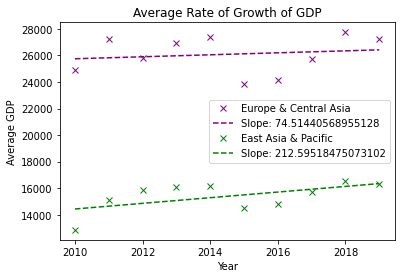

In [93]:
for data,colour,region in zip(means,['purple','green'],regions):
  i = regions.index(region)
  line = [m[i]*year+b[i] for year in years]
  plt.plot(years,means[i],color=colour,marker='x',linestyle='none',label=region)
  plt.plot(years,line,color=colour,linestyle='--',label='Slope: '+m[i].astype('str'))
plt.legend()
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.title('Average Rate of Growth of GDP')
plt.show()

2. Choose one year, for any given country where a substantial change in GDP occurred. Describe what event was likely to be the most responsible for the change?

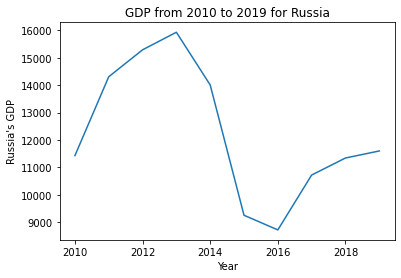

In [101]:
country = 'Russia'
df_filt = df.loc[df['Country'] == country][df.columns[2:12]] #Filter countries from region, and filter years columns
plt.plot(years,np.transpose(df_filt))
plt.xlabel('Year')
plt.ylabel(str(country) + "'s GDP")
plt.title('GDP from 2010 to 2019 for '+ str(country))
plt.show()

Between 2014 and 2015, Russia had a substantial change in GDP (a decrease from 14007.52 to 9257.93, a -33.907% decrease). This could be due to the US, EU, Canada, and Japan imposing sanctions on Russia around this time following the annexation of Crimea.